<a href="https://colab.research.google.com/github/sena1bayram/Diamonds_Regression/blob/main/Regresyon_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

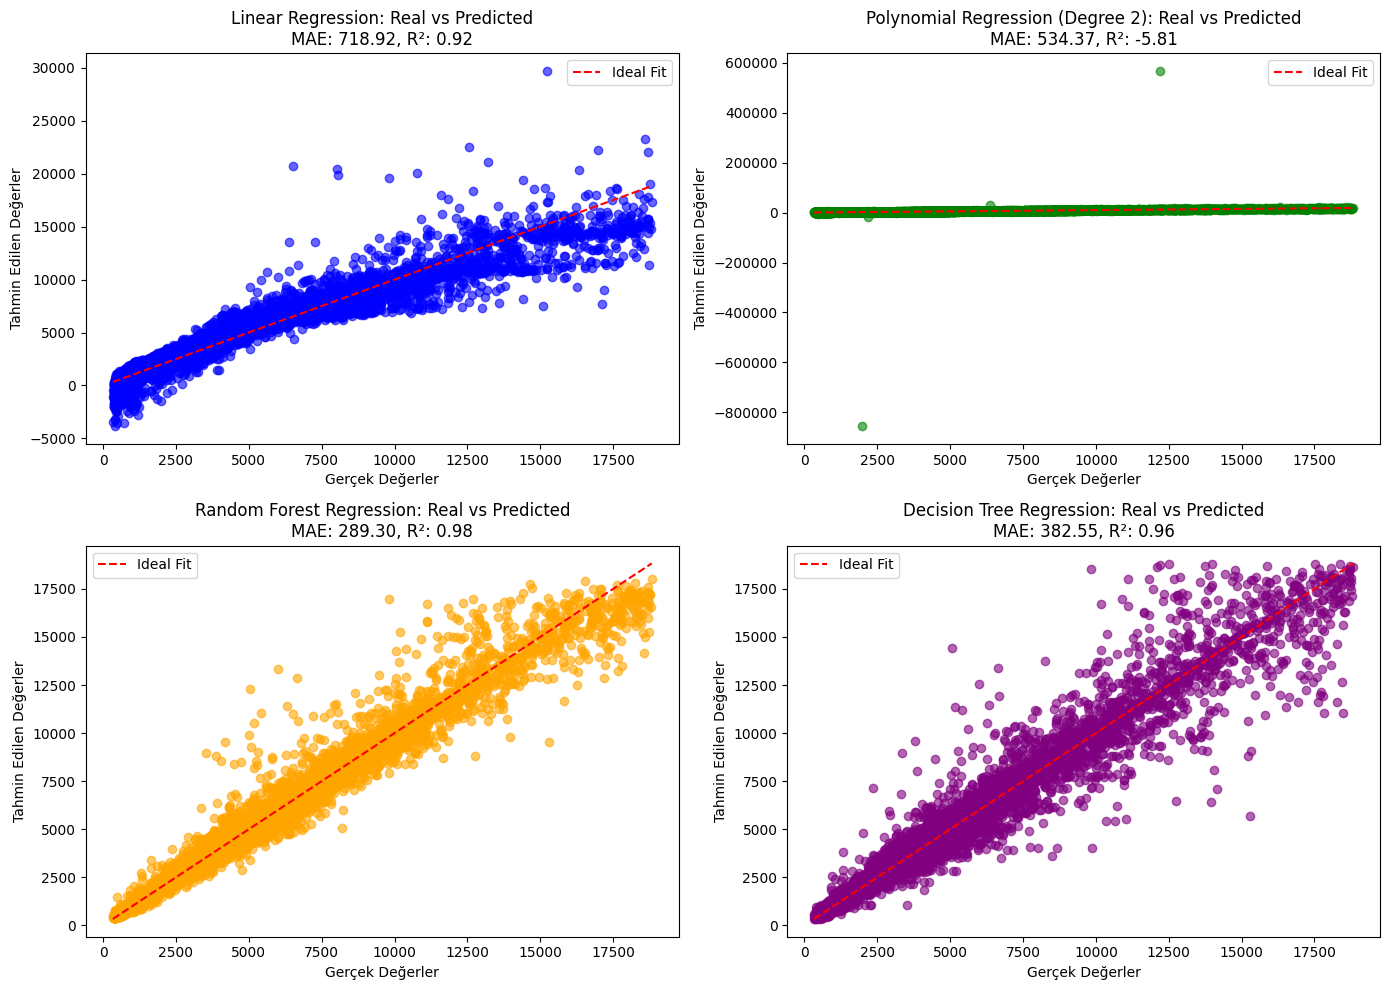

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

# Veri setini yükleyin (örnek veri, kendi veri setinizi buraya ekleyin)
df = pd.read_csv('diamonds.csv')  # Veri setinizi buraya yükleyin

# Özellikler (X) ve hedef (y)
X = df.drop('price', axis=1)
y = df['price']

# Kategorik verileri sayısal verilere dönüştürme (cut, color, clarity gibi)
X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True)

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# 2. Polynomial Regression (Degree 2)
polynomial_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regressor.fit(X_train, y_train)
y_pred_poly = polynomial_regressor.predict(X_test)

# 3. Random Forest Regression
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

# 4. Decision Tree Regression
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)
y_pred_dt = decision_tree_regressor.predict(X_test)

# MAE ve R² skorlarını hesaplama
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Görselleştirme: Her model için gerçek vs tahmin edilen değerler
plt.figure(figsize=(14, 10))

# Linear Regression için scatter plot
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Linear Regression: Real vs Predicted\nMAE: {mae_linear:.2f}, R²: {r2_linear:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Polynomial Regression için scatter plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Polynomial Regression (Degree 2): Real vs Predicted\nMAE: {mae_poly:.2f}, R²: {r2_poly:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Random Forest Regression için scatter plot
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Random Forest Regression: Real vs Predicted\nMAE: {mae_rf:.2f}, R²: {r2_rf:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Decision Tree Regression için scatter plot
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_dt, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Decision Tree Regression: Real vs Predicted\nMAE: {mae_dt:.2f}, R²: {r2_dt:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Grafik düzeni
plt.tight_layout()
plt.show()


# **Optimizasyon Sonucu**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from scipy.stats import randint

# Veri setini yükleyin (örnek veri, kendi veri setinizi buraya ekleyin)
df = pd.read_csv('diamonds.csv')  # Veri setinizi buraya yükleyin

# Özellikler (X) ve hedef (y)
X = df.drop('price', axis=1)
y = df['price']

# Kategorik verileri sayısal verilere dönüştürme (cut, color, clarity gibi)
X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True)

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# 2. Polynomial Regression (Degree 2)
polynomial_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regressor.fit(X_train, y_train)
y_pred_poly = polynomial_regressor.predict(X_test)

# 3. Random Forest Regression
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

# 4. Decision Tree Regression
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)
y_pred_dt = decision_tree_regressor.predict(X_test)

# Hiperparametre optimizasyonu için GridSearchCV ve RandomizedSearchCV kullanacağız

# 1. Linear Regression: Hyperparameter Optimizations (Linear Regression genellikle hiperparametre gerektirmez, ancak örnek olsun)
linear_regressor = LinearRegression()
params_linear = {'fit_intercept': [True, False]}  # Örnek parametre
grid_search_linear = GridSearchCV(linear_regressor, params_linear, cv=5)
grid_search_linear.fit(X_train, y_train)
best_params_linear = grid_search_linear.best_params_
best_model_linear = grid_search_linear.best_estimator_
y_pred_linear_optimized = best_model_linear.predict(X_test)

# 2. Polynomial Regression: Polynomial Features Degree Optimization
polynomial_regressor = make_pipeline(PolynomialFeatures(), LinearRegression())
params_poly = {'polynomialfeatures__degree': [1, 2, 3, 4]}
grid_search_poly = GridSearchCV(polynomial_regressor, params_poly, cv=5)
grid_search_poly.fit(X_train, y_train)
best_params_poly = grid_search_poly.best_params_
best_model_poly = grid_search_poly.best_estimator_
y_pred_poly_optimized = best_model_poly.predict(X_test)

# 3. Random Forest Regression: RandomizedSearchCV ile Hiperparametre Optimizesi
random_forest_regressor = RandomForestRegressor(random_state=42)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}
random_search_rf = RandomizedSearchCV(random_forest_regressor, param_dist_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_
y_pred_rf_optimized = best_model_rf.predict(X_test)

# 4. Decision Tree Regression: GridSearchCV ile Hiperparametre Optimizesi
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(decision_tree_regressor, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt_optimized = best_model_dt.predict(X_test)

# MAE ve R² skorlarını hesaplama
mae_linear_optimized = mean_absolute_error(y_test, y_pred_linear_optimized)
r2_linear_optimized = r2_score(y_test, y_pred_linear_optimized)

mae_poly_optimized = mean_absolute_error(y_test, y_pred_poly_optimized)
r2_poly_optimized = r2_score(y_test, y_pred_poly_optimized)

mae_rf_optimized = mean_absolute_error(y_test, y_pred_rf_optimized)
r2_rf_optimized = r2_score(y_test, y_pred_rf_optimized)

mae_dt_optimized = mean_absolute_error(y_test, y_pred_dt_optimized)
r2_dt_optimized = r2_score(y_test, y_pred_dt_optimized)

# Görselleştirme: Her model için gerçek vs tahmin edilen değerler
plt.figure(figsize=(14, 10))

# Linear Regression için scatter plot
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear_optimized, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Linear Regression: Real vs Predicted\nMAE: {mae_linear_optimized:.2f}, R²: {r2_linear_optimized:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Polynomial Regression için scatter plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_poly_optimized, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Polynomial Regression (Degree {best_params_poly["polynomialfeatures__degree"]}): Real vs Predicted\nMAE: {mae_poly_optimized:.2f}, R²: {r2_poly_optimized:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Random Forest Regression için scatter plot
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf_optimized, color='orange', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Random Forest Regression: Real vs Predicted\nMAE: {mae_rf_optimized:.2f}, R²: {r2_rf_optimized:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Decision Tree Regression için scatter plot
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_dt_optimized, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title(f'Decision Tree Regression: Real vs Predicted\nMAE: {mae_dt_optimized:.2f}, R²: {r2_dt_optimized:.2f}')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Grafik düzeni
plt.tight_layout()
plt.show()

# En iyi parametreleri yazdır
print(f"Linear Regression Best Params: {best_params_linear}")
print(f"Polynomial Regression Best Params: {best_params_poly}")
print(f"Random Forest Best Params: {best_params_rf}")
print(f"Decision Tree Best Params: {best_params_dt}")


Optm. düşürülmüş hali:

Linear Regression - Mean Absolute Error: 718.915201313792
Linear Regression - R² Score: 0.9232213916987426
Polynomial Regression (Degree 2) - Mean Absolute Error: 534.3673765490253
Polynomial Regression (Degree 2) - R² Score: -5.806896727608855
Random Forest Regression - Mean Absolute Error: 319.5043976687005
Random Forest Regression - R² Score: 0.9722512349469696
Decision Tree Regression - Mean Absolute Error: 390.8229561822742
Decision Tree Regression - R² Score: 0.959861366963481


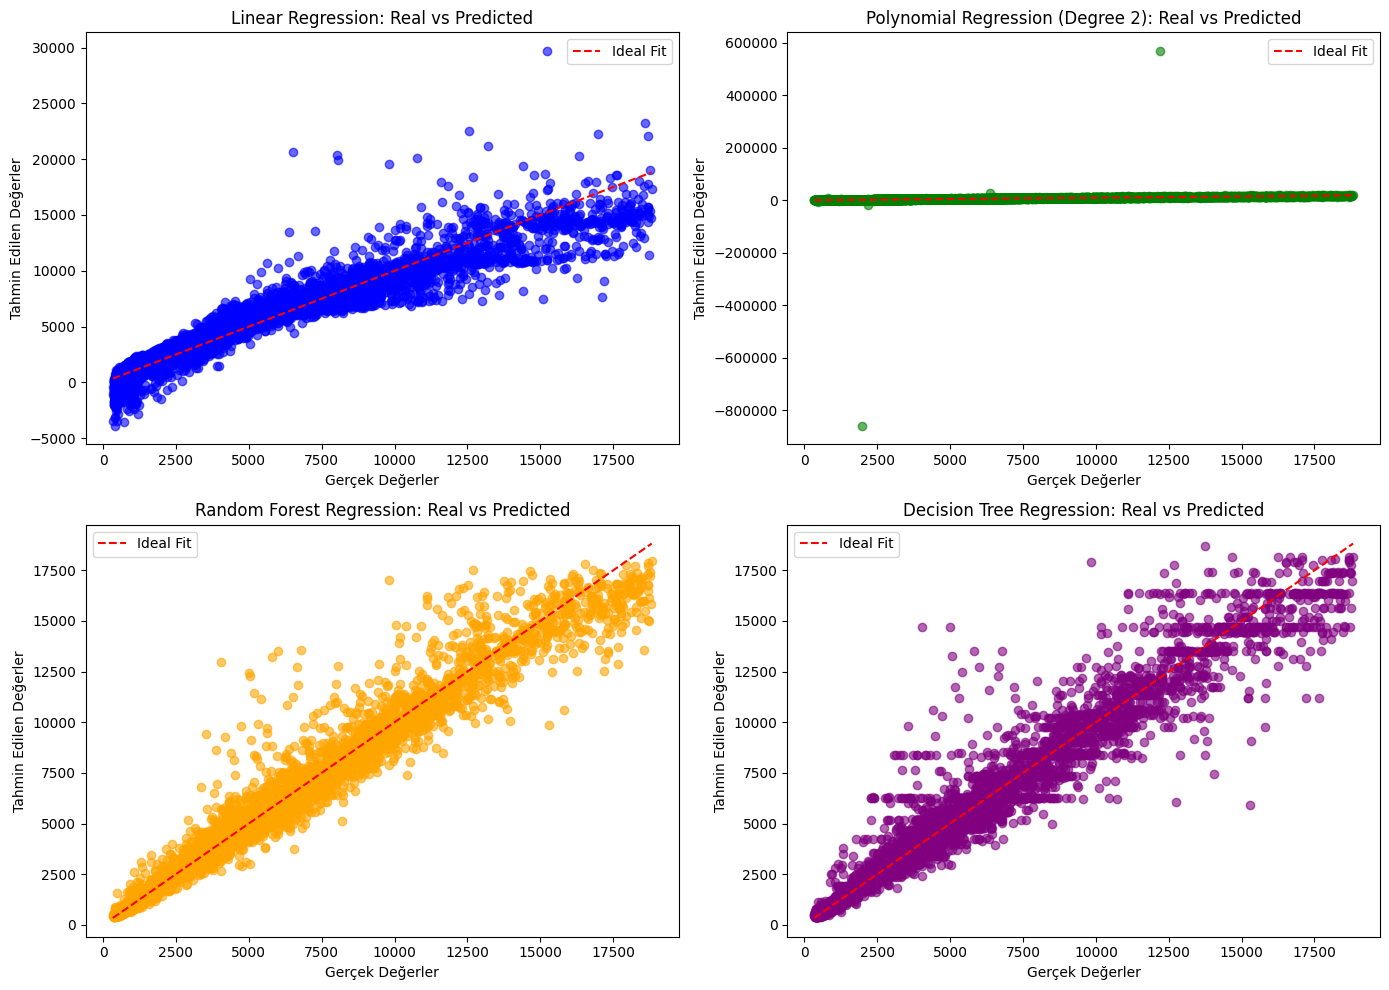

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from scipy.stats import randint

# Veri setini yükleyin (örnek veri, kendi veri setinizi buraya ekleyin)
df = pd.read_csv('diamonds.csv')  # Veri setinizi buraya yükleyin

# Özellikler (X) ve hedef (y)
X = df.drop('price', axis=1)
y = df['price']

# Kategorik verileri sayısal verilere dönüştürme (cut, color, clarity gibi)
X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True)

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre optimizasyonu için `RandomizedSearchCV` fonksiyonu
def optimize_model(model, param_distributions, X_train, y_train, n_iter=10):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='r2',
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

# 1. Linear Regression (Hiperparametre optimizasyonu yok çünkü modelin hiperparametresi sınırlı)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# 2. Polynomial Regression (Degree 2 sabit tutuluyor)
polynomial_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regressor.fit(X_train, y_train)
y_pred_poly = polynomial_regressor.predict(X_test)

# 3. Random Forest Regression
rf_params = {
    'n_estimators': randint(10, 50),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
random_forest_regressor = optimize_model(RandomForestRegressor(random_state=42), rf_params, X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

# 4. Decision Tree Regression
dt_params = {
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
decision_tree_regressor = optimize_model(DecisionTreeRegressor(random_state=42), dt_params, X_train, y_train)
y_pred_dt = decision_tree_regressor.predict(X_test)

# Sonuçları yazdırma
print("Linear Regression - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression - R² Score:", r2_score(y_test, y_pred_linear))

print("Polynomial Regression (Degree 2) - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_poly))
print("Polynomial Regression (Degree 2) - R² Score:", r2_score(y_test, y_pred_poly))

print("Random Forest Regression - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest Regression - R² Score:", r2_score(y_test, y_pred_rf))

print("Decision Tree Regression - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree Regression - R² Score:", r2_score(y_test, y_pred_dt))

# Görselleştirme: Her model için gerçek vs tahmin edilen değerler
plt.figure(figsize=(14, 10))

# Linear Regression için scatter plot
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Real vs Predicted')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Polynomial Regression için scatter plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Polynomial Regression (Degree 2): Real vs Predicted')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Random Forest Regression için scatter plot
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Random Forest Regression: Real vs Predicted')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Decision Tree Regression için scatter plot
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_dt, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Decision Tree Regression: Real vs Predicted')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()

# Grafik düzeni
plt.tight_layout()
plt.show()
